In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Configurar para exibir gráficos
plt.style.use('default')

print("=== EXEMPLO 1: REGRESSÃO - PREVISÃO DE ALUGUEL ===\n")

# Criando um DataFrame do Pandas (como uma planilha do Excel) com esses dados:
df_apartamentos = pd.read_csv("dados_apartamentos.csv")
df_apartamentos


print("📊 DADOS DE APARTAMENTOS:")
print(df_apartamentos.head()) # Mostra as 5 primeiras linhas do DataFrame
print(f"\nTotal de apartamentos: {len(df_apartamentos)}") # Mostra quantos apartamentos foram gerados
print(f"Aluguel médio: R$ {df_apartamentos['aluguel'].mean():.2f}") # Calcula e mostra o aluguel médio

# 2. PREPARANDO OS DADOS PARA O MODELO
# X = variáveis independentes (as características que vamos usar para prever)
# y = variável dependente (o que queremos prever, no caso, o aluguel)
X = df_apartamentos[['tamanho_m2', 'num_quartos', 'localizacao']]
y = df_apartamentos['aluguel']

# Dividindo os dados em conjuntos de treino e teste:
# X_train, y_train: Usados para "ensinar" o modelo.
# X_test, y_test: Usados para "testar" o modelo e ver se ele aprendeu bem.
# test_size=0.2 significa que 20% dos dados serão para teste e 80% para treino.
# random_state=42 garante que a divisão seja sempre a mesma, para resultados reproduzíveis.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. TREINANDO O MODELO DE REGRESSÃO
modelo_regressao = LinearRegression() # Criamos uma instância do modelo de Regressão Linear
modelo_regressao.fit(X_train, y_train) # "Ensinamos" o modelo usando os dados de treino (X_train para características, y_train para os aluguéis reais)

# 4. FAZENDO PREVISÕES
y_pred = modelo_regressao.predict(X_test) # O modelo prevê os aluguéis para os apartamentos que ele NUNCA viu (X_test)

# 5. AVALIANDO O MODELO
# mean_squared_error (MSE): Calcula a média dos quadrados das diferenças entre o que o modelo previu e o valor real.
# rmse = np.sqrt(mse): Root Mean Squared Error (RMSE) é a raiz quadrada do MSE. Ele nos dá o erro na mesma unidade da variável que estamos prevendo (R$, nesse caso).
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"\n🎯 RESULTADOS DO MODELO DE REGRESSÃO:")
print(f"Erro Médio Quadrático (RMSE): R$ {rmse:.2f}")
print(f"Isso significa que, em média, o modelo erra por R$ {rmse:.2f}")

# 6. EXEMPLO PRÁTICO DE PREVISÃO
print(f"\n🏠 EXEMPLO DE PREVISÃO:")
# Criamos um "novo" apartamento com características específicas:
apartamento_exemplo = [[100, 3, 2]]  # 100m², 3 quartos, localização intermediária (2)
# O modelo prevê o aluguel para esse apartamento. [0] pega o primeiro (e único) resultado.
preco_previsto = modelo_regressao.predict(apartamento_exemplo)[0]
print(f"Apartamento: 100m², 3 quartos, localização intermediária")
print(f"Previsão de aluguel: R$ {preco_previsto:.2f}")

# Salvando dados para visualização posterior (útil para o workshop)
df_apartamentos.to_csv('dados_apartamentos.csv', index=False)
print(f"\n💾 Dados salvos em 'dados_apartamentos.csv'")

=== EXEMPLO 1: REGRESSÃO - PREVISÃO DE ALUGUEL ===



,tamanho_m2,num_quartos,localizacao,aluguel
0,94.901425,1,1,1798.541367
1,75.852071,1,1,1727.944937
2,99.430656,3,1,2415.453145
3,125.690896,3,1,2456.336921
4,72.975399,1,3,2296.147919
...,...,...,...,...
995,71.566991,2,3,2732.948019
996,133.930596,2,1,2601.808642
997,99.225286,2,2,2345.857864
998,62.864630,1,3,2528.840366


In [12]:
print("\n" + "="*60)
print("=== EXEMPLO 2: CLASSIFICAÇÃO - PREVISÃO DE CHURN ===\n")



# Criando DataFrame
df_clientes = pd.read_csv("dados_clientes_churn.csv")


print("📊 DADOS DE CLIENTES:")
print(df_clientes.head())
print(f"\nTotal de clientes: {len(df_clientes)}")
print(f"Taxa de churn: {df_clientes['churn'].mean():.1%}")

# 2. PREPARANDO OS DADOS PARA O MODELO
X = df_clientes[['idade', 'tempo_cliente_meses', 'valor_mensal', 'num_reclamacoes']]
y = df_clientes['churn']

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. TREINANDO O MODELO DE CLASSIFICAÇÃO
modelo_classificacao = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_classificacao.fit(X_train, y_train)

# 4. FAZENDO PREVISÕES
y_pred = modelo_classificacao.predict(X_test)
y_pred_proba = modelo_classificacao.predict_proba(X_test)[:, 1]  # Probabilidade de churn

# 5. AVALIANDO O MODELO
accuracy = accuracy_score(y_test, y_pred)

print(f"\n🎯 RESULTADOS DO MODELO DE CLASSIFICAÇÃO:")
print(f"Acurácia: {accuracy:.1%}")
print(f"Isso significa que o modelo acerta {accuracy:.1%} das previsões")

print(f"\n📋 RELATÓRIO DETALHADO:")
print(classification_report(y_test, y_pred, target_names=['Não Churn', 'Churn']))

# 6. EXEMPLO PRÁTICO DE PREVISÃO
print(f"\n👤 EXEMPLO DE PREVISÃO:")
cliente_exemplo = [[45, 6, 150, 3]]  # 45 anos, 6 meses cliente, R$150/mês, 3 reclamações
previsao = modelo_classificacao.predict(cliente_exemplo)[0]
probabilidade = modelo_classificacao.predict_proba(cliente_exemplo)[0, 1]

print(f"Cliente: 45 anos, 6 meses como cliente, gasta R$150/mês, 3 reclamações")
print(f"Previsão: {'VAI CANCELAR' if previsao == 1 else 'NÃO VAI CANCELAR'}")
print(f"Probabilidade de churn: {probabilidade:.1%}")

# 7. IMPORTÂNCIA DAS VARIÁVEIS
importancias = modelo_classificacao.feature_importances_
features = ['idade', 'tempo_cliente_meses', 'valor_mensal', 'num_reclamacoes']

print(f"\n📊 IMPORTÂNCIA DAS VARIÁVEIS:")
for feature, importancia in zip(features, importancias):
    print(f"{feature}: {importancia:.3f}")

# Salvando dados
df_clientes.to_csv('dados_clientes_churn.csv', index=False)
print(f"\n💾 Dados salvos em 'dados_clientes_churn.csv'")


=== EXEMPLO 2: CLASSIFICAÇÃO - PREVISÃO DE CHURN ===



,idade,tempo_cliente_meses,valor_mensal,num_reclamacoes,churn
0,40,4,42.633176,1,1
1,33,2,29.912453,1,1
2,42,24,70.480749,0,1
3,53,29,159.550479,1,0
4,32,1,20.000000,2,1
...,...,...,...,...,...
995,31,7,32.465819,2,1
996,56,5,20.851780,0,1
997,42,17,23.721089,3,1
998,28,1,36.974839,0,1


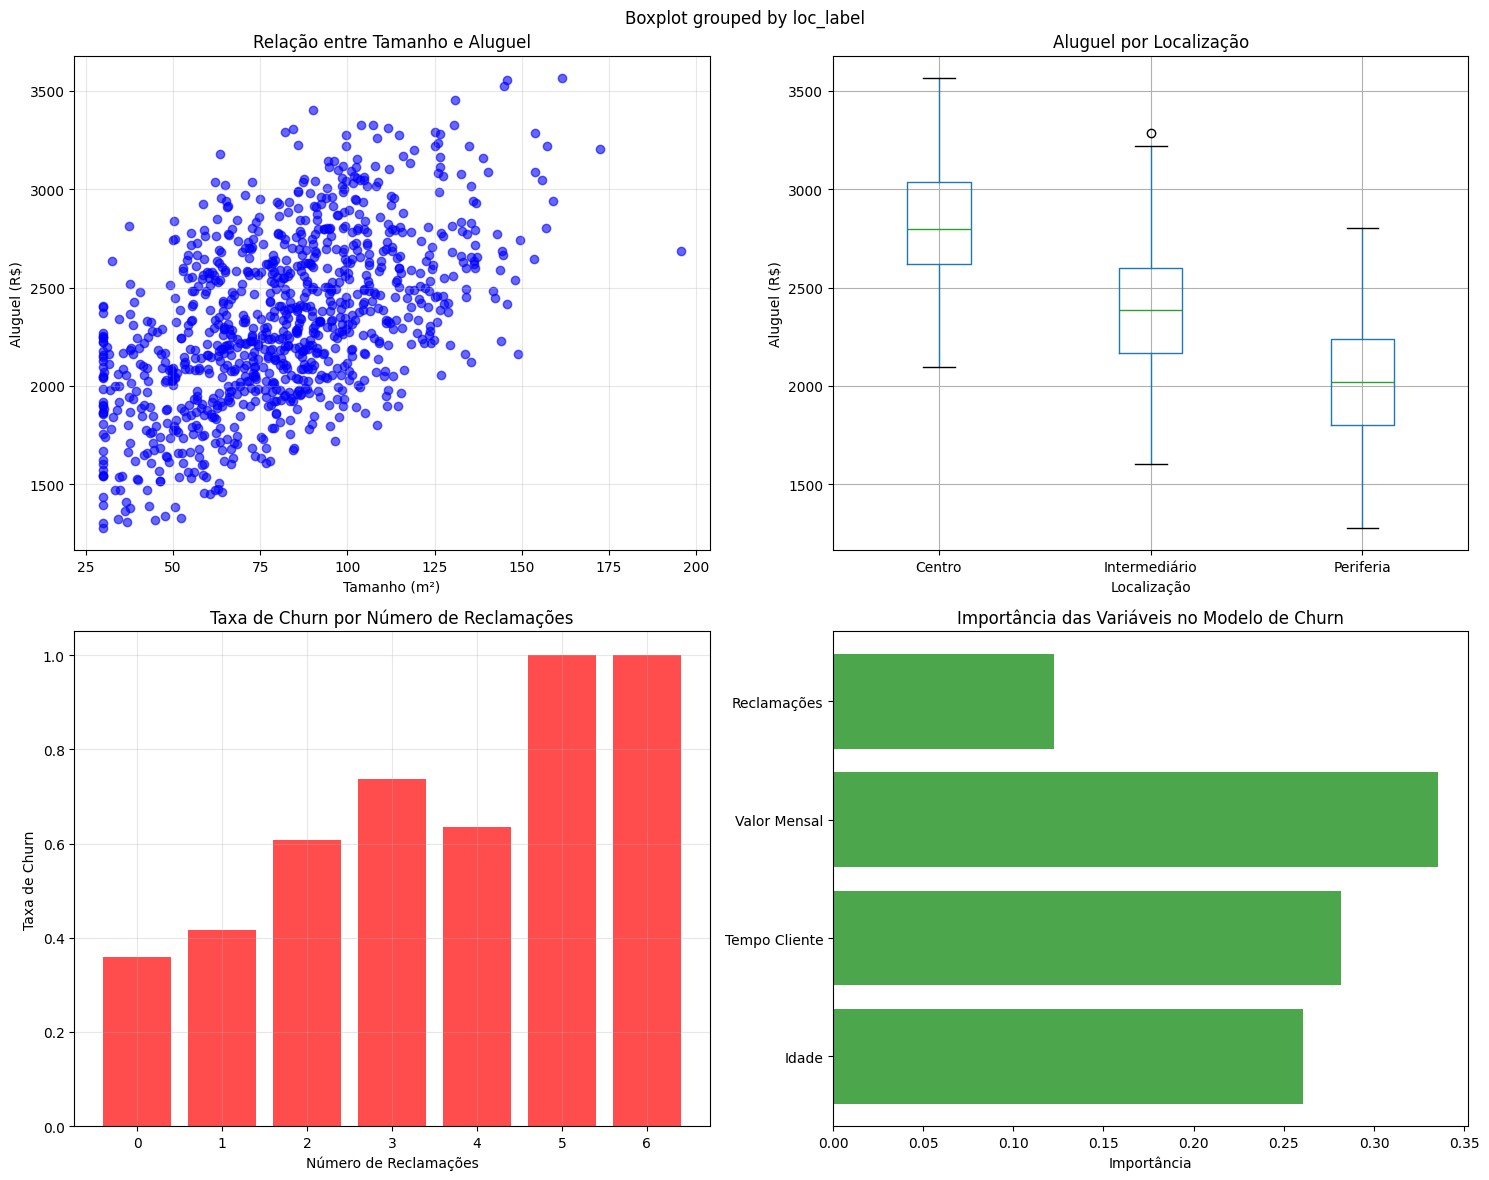


📈 GRÁFICOS GERADOS:
1. Relação entre tamanho do apartamento e aluguel
2. Distribuição de aluguel por localização
3. Taxa de churn por número de reclamações
4. Importância das variáveis no modelo de churn


In [3]:
# Criando visualizações para os exemplos
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Gráfico de dispersão: Tamanho vs Aluguel
ax1.scatter(df_apartamentos['tamanho_m2'], df_apartamentos['aluguel'], alpha=0.6, color='blue')
ax1.set_xlabel('Tamanho (m²)')
ax1.set_ylabel('Aluguel (R$)')
ax1.set_title('Relação entre Tamanho e Aluguel')
ax1.grid(True, alpha=0.3)

# 2. Boxplot: Aluguel por Localização
localizacao_labels = {1: 'Periferia', 2: 'Intermediário', 3: 'Centro'}
df_apartamentos['loc_label'] = df_apartamentos['localizacao'].map(localizacao_labels)
df_apartamentos.boxplot(column='aluguel', by='loc_label', ax=ax2)
ax2.set_title('Aluguel por Localização')
ax2.set_xlabel('Localização')
ax2.set_ylabel('Aluguel (R$)')

# 3. Distribuição de Churn por Número de Reclamações
churn_reclamacoes = df_clientes.groupby('num_reclamacoes')['churn'].mean()
ax3.bar(churn_reclamacoes.index, churn_reclamacoes.values, color='red', alpha=0.7)
ax3.set_xlabel('Número de Reclamações')
ax3.set_ylabel('Taxa de Churn')
ax3.set_title('Taxa de Churn por Número de Reclamações')
ax3.grid(True, alpha=0.3)

# 4. Importância das Variáveis no Modelo de Churn
features = ['Idade', 'Tempo Cliente', 'Valor Mensal', 'Reclamações']
importancias = modelo_classificacao.feature_importances_
ax4.barh(features, importancias, color='green', alpha=0.7)
ax4.set_xlabel('Importância')
ax4.set_title('Importância das Variáveis no Modelo de Churn')

plt.tight_layout()
plt.show()

print("\n📈 GRÁFICOS GERADOS:")
print("1. Relação entre tamanho do apartamento e aluguel")
print("2. Distribuição de aluguel por localização")
print("3. Taxa de churn por número de reclamações")
print("4. Importância das variáveis no modelo de churn")

In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Dados simulados: clientes com variáveis de comportamento

df = pd.read_csv("habitos_clientes.csv")
df


# 2. Padronizar (importante para K-Means)
features = ['valor_mensal_medio', 'freq_compras_mes', 'ticket_medio', 'dias_desde_ultima_compra']
X = df[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Escolher k (número de clusters) – exemplo com k=3
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# 4. Interpretar clusters
cluster_profile = df.groupby('cluster')[features].mean().round(1)
print("Perfis médios por cluster:")
print(cluster_profile)

# 5. Visualização 2D rápida (usando duas features só para plot)
plt.figure(figsize=(7,5))
for c in sorted(df['cluster'].unique()):
    subset = df[df['cluster']==c]
    plt.scatter(subset['valor_mensal_medio'], subset['ticket_medio'], s=30, label=f'Cluster {c}', alpha=0.7)
plt.xlabel('Valor mensal médio')
plt.ylabel('Ticket médio')
plt.title('Clusters de clientes (visualização 2D)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

,Unnamed: 0,valor_mensal_medio,freq_compras_mes,ticket_medio,dias_desde_ultima_compra
0,0,119.683969,2,191.782315,8.497104
1,1,74.723237,5,88.649373,19.100751
2,2,69.114179,5,92.378358,32.533617
3,3,69.115115,8,83.352323,41.730421
4,4,232.485721,2,86.727112,42.056629
...,...,...,...,...,...
495,495,103.181358,4,145.619192,6.319266
496,496,106.840448,1,112.379876,36.293517
497,497,72.425330,4,132.962281,24.389332
498,498,41.695023,1,74.092344,13.324069


Variância explicada por componente: [0.488 0.296 0.089]
Variância total explicada (3 PCs): 0.873


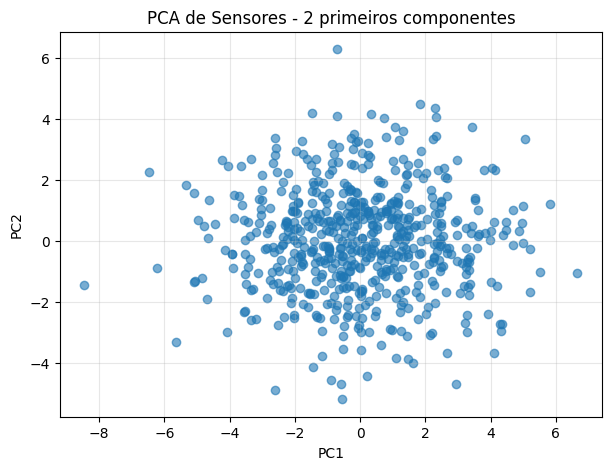


Cargas dos sensores nos componentes (loadings):
             PC1    PC2    PC3
sensor_1  -0.388  0.196 -0.128
sensor_2  -0.256  0.379  0.366
sensor_3  -0.292 -0.355  0.312
sensor_4   0.202  0.303  0.632
sensor_5  -0.169  0.490 -0.118
sensor_6  -0.261  0.435 -0.005
sensor_7   0.345  0.034  0.450
sensor_8   0.434  0.038  0.008
sensor_9   0.409  0.157 -0.195
sensor_10 -0.295 -0.379  0.314


In [16]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Dados simulados de sensores (10 sensores)
np.random.seed(42)
n = 600
sensores = [f'sensor_{i}' for i in range(1, 11)]
base = np.random.normal(0, 1, size=(n, 3))  # 3 fatores ocultos que influenciam tudo
ruido = np.random.normal(0, 0.5, size=(n, 10))
# Mistura linear para criar correlação entre sensores
W = np.random.randn(3, 10)
X = base @ W + ruido
df_sensores = pd.DataFrame(X, columns=sensores)

# 2. Padronizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_sensores)

# 3. PCA
pca = PCA(n_components=3)  # reduzir de 10 para 3 componentes
X_pca = pca.fit_transform(X_scaled)

print("Variância explicada por componente:", np.round(pca.explained_variance_ratio_, 3))
print("Variância total explicada (3 PCs):", np.round(pca.explained_variance_ratio_.sum(), 3))

# 4. Visualização dos 2 primeiros componentes
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA de Sensores - 2 primeiros componentes')
plt.grid(alpha=0.3)
plt.show()

# 5. Cargas (quais sensores mais pesam em cada componente)
loadings = pd.DataFrame(pca.components_.T, index=sensores, columns=['PC1','PC2','PC3']).round(3)
print("\nCargas dos sensores nos componentes (loadings):")
print(loadings)

In [ ]:
# Projeto: Previsão de Inadimplência em Fintech
# Etapas (sem coleta/prep): Entendimento -> Escolha do Modelo -> Treinamento -> Avaliação -> Implantação/Monitoramento

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (accuracy_score, roc_auc_score, confusion_matrix,
                             precision_recall_fscore_support, classification_report)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 0) Carregar dados já preparados
DF_PATH = 'fintech_inadimplencia.csv'
df = pd.read_csv(DF_PATH)

print("Visão geral dos dados:")
print(df.head())
print("\nDistribuição da variável-alvo (default):")
print(df['default'].value_counts())
print("\nProporções:")
print((df['default'].value_counts(normalize=True)*100).round(2).astype(str) + '%')

X = df.drop(columns=['default'])
y = df['default']

# 1) Escolha do Modelo (justificativa durante execução):
# - Começamos com um baseline interpretável e simples (Regressão Logística)
#   porque fornece probabilidades, coeficientes e é robusta.
# - Em seguida, um modelo não-linear simples (Árvore de Decisão) para capturar relações não-lineares.
# - Por fim, um ensemble forte (RandomForest) como referência de performance.

# Observação: os dados estão MUITO desbalanceados (1% de default). Acurácia não é uma métrica adequada sozinha.
# Usaremos AUC-ROC e também avaliaremos precision/recall na classe minoritária.

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Pipelines
pipe_logit = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=200, class_weight='balanced', n_jobs=None))
])

# Árvore de decisão com penalização para classe minoritária
clf_tree = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)

# Random Forest com balanceamento
clf_rf = RandomForestClassifier(n_estimators=200, max_depth=None, class_weight='balanced',
                               random_state=42, n_jobs=-1)

modelos = {
    'LogisticRegression': pipe_logit,
    'DecisionTree': clf_tree,
    'RandomForest': clf_rf
}

print("\nAvaliando AUC-ROC por validação cruzada (5 folds)...")
for nome, modelo in modelos.items():
    auc_scores = cross_val_score(modelo, X, y, scoring='roc_auc', cv=skf, n_jobs=-1)
    print(f"{nome}: AUC-ROC médio = {auc_scores.mean():.3f} +/- {auc_scores.std():.3f}")

# 2) Treinamento final e avaliação holdout
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

resultados = {}
for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    if hasattr(modelo, 'predict_proba'):
        y_proba = modelo.predict_proba(X_test)[:, 1]
    else:
        # Para árvores sem predict_proba em alguns settings (não é o caso aqui), poderíamos usar decision_function
        y_proba = modelo.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', pos_label=1, zero_division=0)
    conf = confusion_matrix(y_test, y_pred)

    resultados[nome] = {
        'accuracy': acc,
        'auc': auc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'conf_matrix': conf
    }

print("\nResultados no conjunto de teste (holdout):")
for nome, met in resultados.items():
    print(f"\n{nome}")
    print(f"Acurácia: {met['accuracy']:.3f}")
    print(f"AUC-ROC: {met['auc']:.3f}")
    print(f"Precision (classe 1): {met['precision']:.3f}")
    print(f"Recall (classe 1): {met['recall']:.3f}")
    print(f"F1 (classe 1): {met['f1']:.3f}")
    print("Matriz de confusão:")
    print(met['conf_matrix'])

# 3) Escolha do modelo final baseada nas métricas
# Critério: priorizamos AUC-ROC e Recall da classe 1 (capturar inadimplentes),
# já que o custo de perder um inadimplente é alto.

melhor_modelo = max(resultados.items(), key=lambda kv: (kv[1]['auc'], kv[1]['recall']))[0]
print(f"\n💡 Modelo escolhido: {melhor_modelo} (maior AUC-ROC e bom recall)")

# 4) Treinar modelo final no conjunto completo de treino e salvar thresholds recomendados
modelo_final = modelos[melhor_modelo]
modelo_final.fit(X_train, y_train)
probas = modelo_final.predict_proba(X_test)[:, 1]

# Ajustar limiar (threshold) para otimizar recall mantendo precisão razoável
# Exemplo simples: escolher threshold que maximiza F1
thresholds = np.linspace(0.01, 0.99, 99)
melhor_t, melhor_f1 = 0.5, 0
for t in thresholds:
    y_hat = (probas >= t).astype(int)
    p, r, f1, _ = precision_recall_fscore_support(y_test, y_hat, average='binary', pos_label=1, zero_division=0)
    if f1 > melhor_f1:
        melhor_f1, melhor_t, melhor_p, melhor_r = f1, t, p, r

print(f"\n🔧 Threshold recomendado para produção: {melhor_t:.2f}")
print(f"Precision@t*: {melhor_p:.3f} | Recall@t*: {melhor_r:.3f} | F1@t*: {melhor_f1:.3f}")

# 5) Simular predição para novos clientes
novos_clientes = pd.DataFrame({
    'idade': [29, 52, 41],
    'ingresso_mensal': [3500, 12000, 8000],
    'score_credito': [580, 720, 640],
    'qtd_emprestimos': [2, 1, 3],
    'percent_utilizacao_limite': [75, 40, 90],
    'percent_pagamentos_em_dia': [0.65, 0.98, 0.7],
    'atrasos_6m': [2, 0, 1]
})

proba_novos = modelo_final.predict_proba(novos_clientes)[:, 1]
y_hat_novos = (proba_novos >= melhor_t).astype(int)

saida = novos_clientes.copy()
saida['prob_default'] = np.round(proba_novos, 3)
saida['pred_default'] = y_hat_novos
print("\n📦 Previsão para novos clientes:")
print(saida)